<a href="https://colab.research.google.com/github/alice202122/2competitionDL/blob/main/classicwithmodifiedparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [121]:
%cd /gdrive/My Drive/ANN/homework2

/gdrive/My Drive/ANN/homework2


In [122]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller, grangercausalitytests

import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.7.0


In [123]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [124]:
dataset = pd.read_csv('Training.csv',dtype=np.float32)
print(dataset.shape)
dataset.head()

(68528, 7)


,Sponginess,Wonder level,Crunchiness,Loudness on impact,Meme creativity,Soap slipperiness,Hype root
0,7.976980,4.33494,10.672820,1.76692,3.22440,51.681461,3.65434
1,8.078239,4.44616,10.561601,1.70716,3.32566,51.563599,3.47672
2,8.028440,4.22372,10.561601,1.64906,3.17460,50.863079,3.47672
3,8.028440,4.22372,10.561601,1.70716,3.17460,45.841579,3.47672
4,7.875721,4.44616,10.450379,1.70716,3.27586,47.126423,3.47672


In [47]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68528 entries, 0 to 68527
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sponginess          68528 non-null  float32
 1   Wonder level        68528 non-null  float32
 2   Crunchiness         68528 non-null  float32
 3   Loudness on impact  68528 non-null  float32
 4   Meme creativity     68528 non-null  float32
 5   Soap slipperiness   68528 non-null  float32
 6   Hype root           68528 non-null  float32
dtypes: float32(7)
memory usage: 1.8 MB


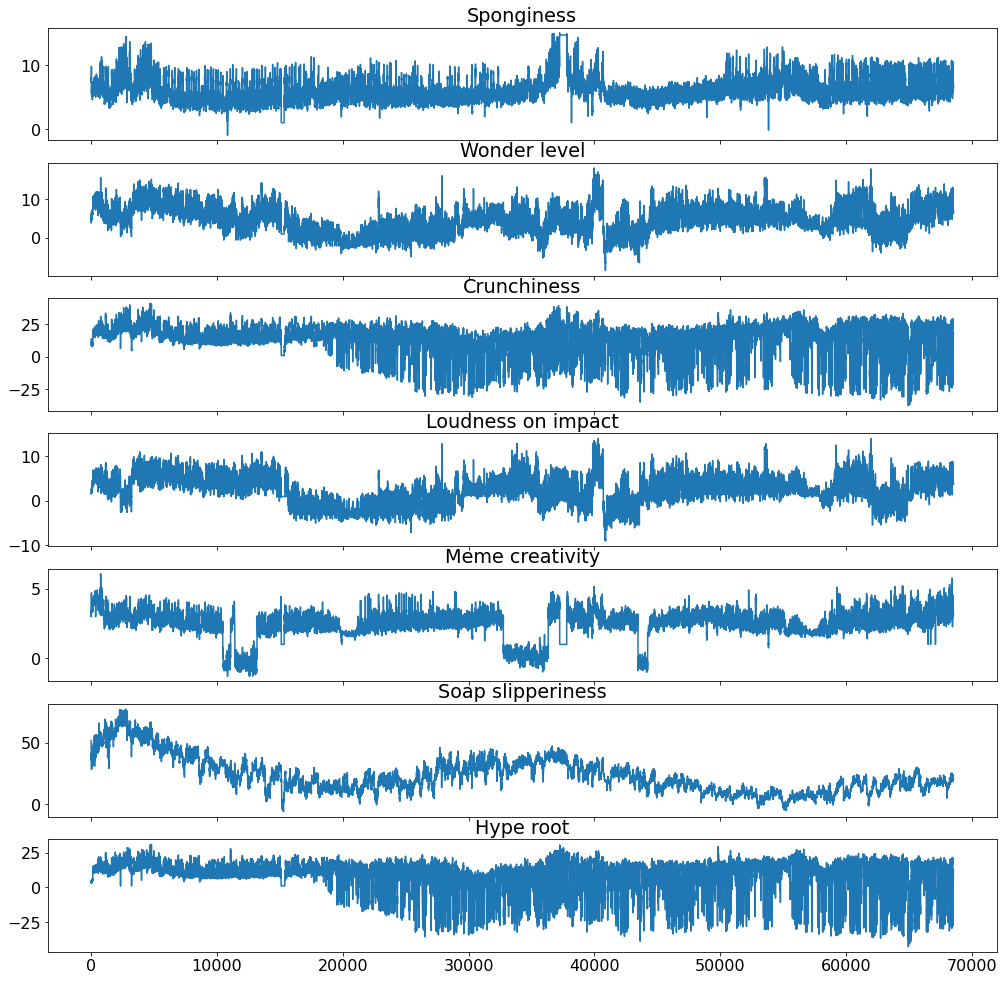

In [125]:
def inspect_dataframe(df, columns):
    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(df[col])
        axs[i].set_title(col)
    plt.show()
inspect_dataframe(dataset, dataset.columns)

In [49]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45dbbf7f10>,
      dtype=object)

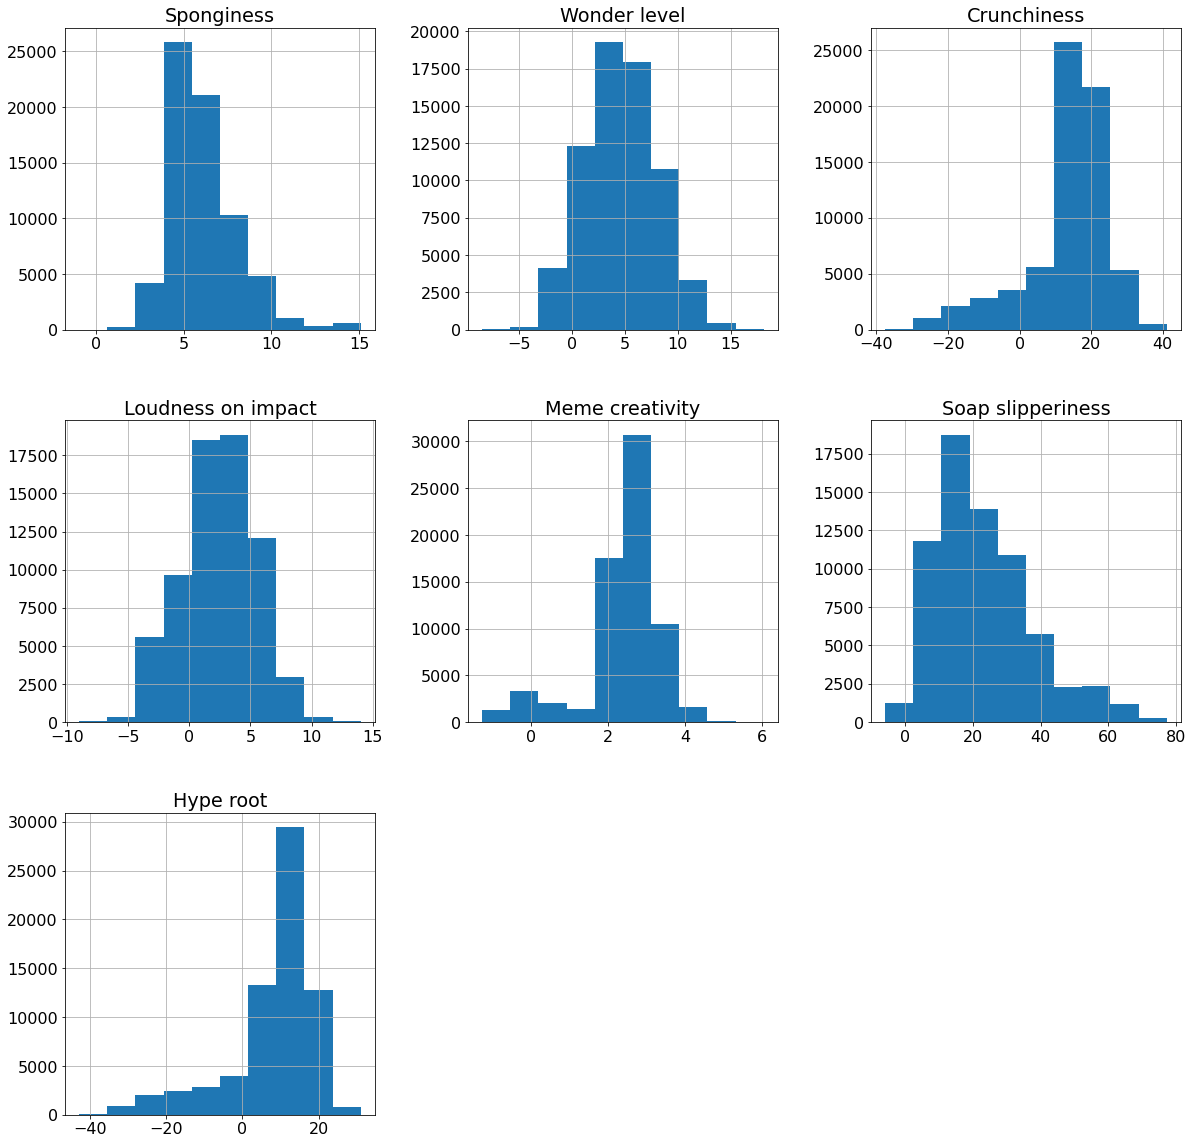

In [18]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dataset.hist(ax = ax)

WE DO NOT APPLY STANDARDIZATION BECAUSE THE DISTRIBUTIONS ARE NOT GAUSSIAN.

In [ ]:
#Sponginess
ad_fuller_result_1=adfuller(dataset['Sponginess'])
print ('realSponginess')
print( 'ADF Statistic: ', { ad_fuller_result_1[0]})
print( 'p value: ', { ad_fuller_result_1[1]})


realSponginess
ADF Statistic:  {-16.164802536550184}
p value:  {4.4272267803744156e-29}


In [ ]:
#Wonder level
ad_fuller_result_2=adfuller(dataset['Wonder level'])
print ('realWonderlevel')
print( 'ADF Statistic: ', { ad_fuller_result_2[0]})
print( 'p value: ', { ad_fuller_result_2[1]})

In [ ]:
#é stazionario perchè il p_value è minoredi 0.05

(65528, 7) (3000, 7)


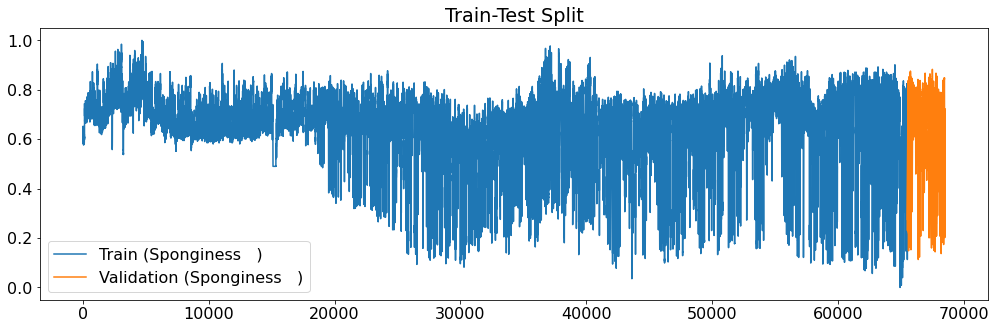

In [127]:
test_size = 3000
X_train_raw = dataset.iloc[:-test_size]
#_train_raw = y.iloc[:-test_size]
X_test_raw = dataset.iloc[-test_size:]
#y_test_raw = y.iloc[-test_size:]
print(X_train_raw.shape, X_test_raw.shape)

# Normalize both features and labels
X_min = X_train_raw.min()
X_max = X_train_raw.max()

X_train_raw = (X_train_raw-X_min)/(X_max-X_min)
X_test_raw = (X_test_raw-X_min)/(X_max-X_min)

plt.figure(figsize=(17,5))
plt.plot(X_train_raw.Crunchiness, label='Train (Sponginess   )')
plt.plot(X_test_raw.Crunchiness , label='Validation (Sponginess   )')
plt.title('Train-Test Split')
plt.legend()
plt.show()

In [128]:

X_train_raw


,Sponginess,Wonder level,Crunchiness,Loudness on impact,Meme creativity,Soap slipperiness,Hype root
0,0.556577,0.481134,0.612986,0.468044,0.613765,0.691885,0.629100
1,0.562874,0.485320,0.611573,0.465453,0.627575,0.690471,0.626693
2,0.559777,0.476949,0.611573,0.462934,0.606973,0.682070,0.626693
3,0.559777,0.476949,0.611573,0.465453,0.606973,0.621844,0.626693
4,0.550279,0.485320,0.610160,0.465453,0.620783,0.637254,0.626693
...,...,...,...,...,...,...,...
65523,0.364753,0.502061,0.210451,0.478264,0.558750,0.372541,0.231025
65524,0.367954,0.573213,0.169499,0.560098,0.593163,0.376762,0.189454
65525,0.358455,0.556472,0.185020,0.460343,0.606973,0.379549,0.211027
65526,0.358455,0.577399,0.221754,0.480855,0.593163,0.372541,0.253408


In [129]:
window = 200
stride = 5

In [130]:
future = dataset[-window:]
future = (future-X_min)/(X_max-X_min)
future = np.expand_dims(future, axis=0)
future.shape

(1, 200, 7)

In [131]:
future

array([[[0.43392524, 0.5773988 , 0.63982964, ..., 0.5999547 ,
         0.36135224, 0.6842579 ],
        [0.4245302 , 0.56902796, 0.6483067 , ..., 0.60697305,
         0.34733617, 0.69543797],
        [0.42143297, 0.56065714, 0.65395814, ..., 0.60697305,
         0.3277256 , 0.70184916],
        ...,
        [0.48110673, 0.58158416, 0.69632244, ..., 0.5999547 ,
         0.3165366 , 0.73622173],
        [0.48740447, 0.56902796, 0.7047995 , ..., 0.5999547 ,
         0.30952856, 0.7426104 ],
        [0.50629777, 0.58576953, 0.72175366, ..., 0.59316283,
         0.3109222 , 0.7577946 ]]], dtype=float32)

In [132]:
def build_sequences(df, target_labels=['Sponginess'], window=200, stride=5, telescope=864):
    # Sanity check to avoid runtime errors
    assert window % stride == 0
    dataset = []
    labels = []

    temp_df = df.copy().values
    temp_label = df[target_labels].copy().values
    padding_len = len(df)%window

    if(padding_len != 0):
        # Compute padding length
        padding_len = window - len(df)%window
        padding = np.zeros((padding_len,temp_df.shape[1]), dtype='float32')
        temp_df = np.concatenate((padding,df))
        padding = np.zeros((padding_len,temp_label.shape[1]), dtype='float32')
        temp_label = np.concatenate((padding,temp_label))
        assert len(temp_df) % window == 0

    for idx in np.arange(0,len(temp_df)-window-telescope,stride):
        dataset.append(temp_df[idx:idx+window])
        labels.append(temp_label[idx+window:idx+window+telescope])

    dataset = np.array(dataset)
    labels = np.array(labels)
    return dataset, labels


In [133]:
target_labels = dataset.columns
telescope = 864

In [134]:
X_train, y_train = build_sequences(X_train_raw, target_labels, window, stride, telescope)
X_test, y_test = build_sequences(X_test_raw, target_labels, window, stride, telescope)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12908, 200, 7), (12908, 864, 7), (388, 200, 7), (388, 864, 7))

In [135]:
from datetime import datetime
from keras.preprocessing import sequence

In [136]:

def inspect_multivariate(X, y, columns, telescope, idx=None):
    if(idx==None):
        idx=np.random.randint(0,len(X))

    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(np.arange(len(X[0,:,i])), X[idx,:,i])
        axs[i].scatter(np.arange(len(X[0,:,i]), len(X_train[0,:,i])+telescope), y[idx,:,i], color='orange')
        axs[i].set_title(col)
        axs[i].set_ylim(0,1)
    plt.show()

In [137]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1:]


In [138]:
batch_size = 32
epochs =200

In [139]:
def build_CONV_LSTM_model(input_shape, output_shape):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    convlstm = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True))(input_layer)
    convlstm = tfkl.Conv1D(64, 3, padding='same', activation='relu')(convlstm)
    convlstm = tfkl.MaxPool1D(4,4)(convlstm)
    convlstm = tfkl.Bidirectional(tfkl.LSTM(32, return_sequences=True))(convlstm)
    convlstm = tfkl.Conv1D(128, 3, padding='same', activation='selu')(convlstm)
    convlstm = tfkl.GlobalAveragePooling1D()(convlstm)
    convlstm = tfkl.Dropout(.3)(convlstm)

    dense = tfkl.Dense(output_shape[-1]*output_shape[-2], activation='selu')(convlstm)
    output_layer = tfkl.Reshape((output_shape[-2],output_shape[-1]))(dense)
    output_layer = tfkl.Conv1D(output_shape[-1], 1, padding='valid')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.MeanSquaredError(), optimizer=tfk.optimizers.Adam(), metrics=['mse'])

    # Return the model
    return model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 200, 7)]          0         
                                                                 
 bidirectional_15 (Bidirecti  (None, 200, 128)         36864     
 onal)                                                           
                                                                 
 conv1d_18 (Conv1D)          (None, 200, 64)           24640     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 50, 64)           0         
 1D)                                                             
                                                                 
 bidirectional_16 (Bidirecti  (None, 50, 64)           24832     
 onal)                                                           
                                                             

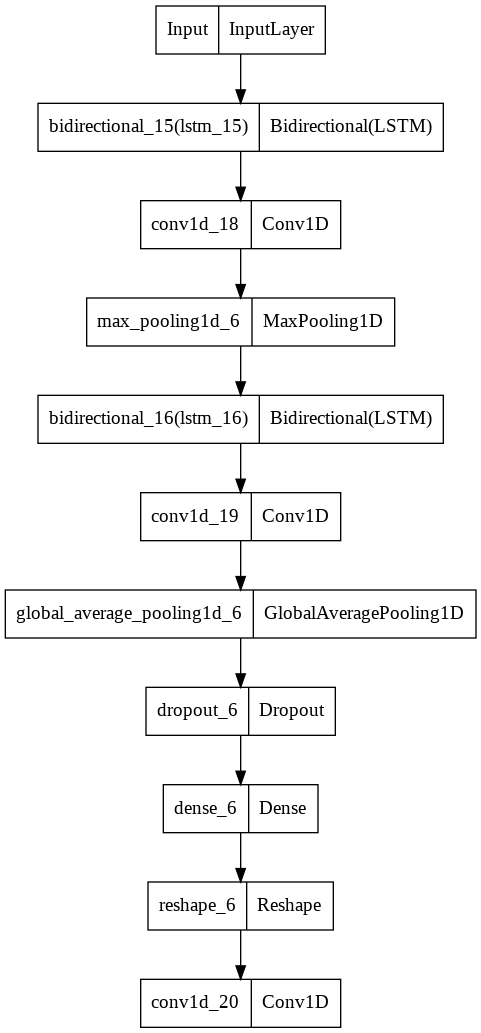

In [140]:
model = build_CONV_LSTM_model(input_shape, output_shape)
model.summary()
tfk.utils.plot_model(model, expand_nested=True)


In [142]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=20, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=20, factor=0.5, min_lr=1e-6)
    ]
).history

Epoch 1/200
364/364 [==============================] - 50s 137ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0197 - val_mse: 0.0197 - lr: 0.0010
Epoch 2/200
364/364 [==============================] - 48s 132ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0195 - val_mse: 0.0195 - lr: 0.0010
Epoch 3/200
364/364 [==============================] - 48s 131ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0197 - val_mse: 0.0197 - lr: 0.0010
Epoch 4/200
364/364 [==============================] - 48s 131ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0201 - val_mse: 0.0201 - lr: 0.0010
Epoch 5/200
364/364 [==============================] - 48s 131ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0191 - val_mse: 0.0191 - lr: 0.0010
Epoch 6/200
364/364 [==============================] - 48s 131ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0166 - val_mse: 0.0166 - lr: 0.0010
Epoch 7/200
364/364 [==============================] - 48s 132ms/step - loss: 0.0105 - mse: 0.0105 - val_l

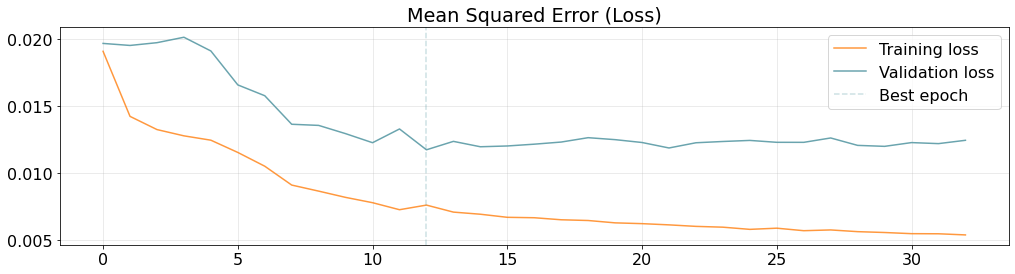

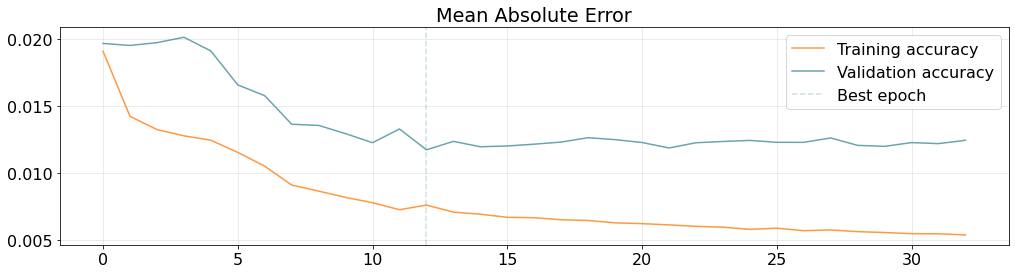

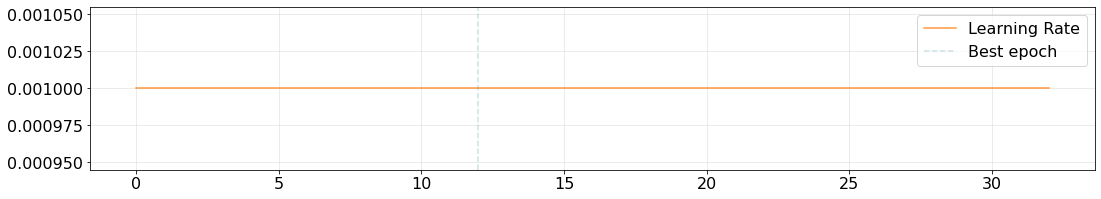

In [144]:
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error (Loss)')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['mse'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_mse'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Absolute Error')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [145]:
model.save('classicwithmodifiedparameters')

In [146]:

model = tfk.models.load_model('classicwithmodifiedparameters')

In [147]:
# Predict the test set 
predictions = model.predict(X_test)
print(predictions.shape)

mean_squared_error = tfk.metrics.mse(y_test.flatten(),predictions.flatten())
mean_absolute_error = tfk.metrics.mae(y_test.flatten(),predictions.flatten())
mean_squared_error, mean_absolute_error

(388, 864, 7)


(<tf.Tensor: shape=(), dtype=float32, numpy=0.0100887455>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.07685899>)

In [149]:
def inspect_multivariate_prediction(X, y, pred, columns, telescope, idx=None):
    if(idx==None):
        idx=np.random.randint(0,len(X))

    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(np.arange(len(X[0,:,i])), X[idx,:,i])
        axs[i].scatter(np.arange(len(X[0,:,i]), len(X_train[0,:,i])+telescope), y[idx,:,i], color='orange')
        axs[i].scatter(np.arange(len(X[0,:,i]), len(X_train[0,:,i])+telescope), pred[idx,:,i], color='green')
        axs[i].set_title(col)
        axs[i].set_ylim(0,1)
    plt.show()

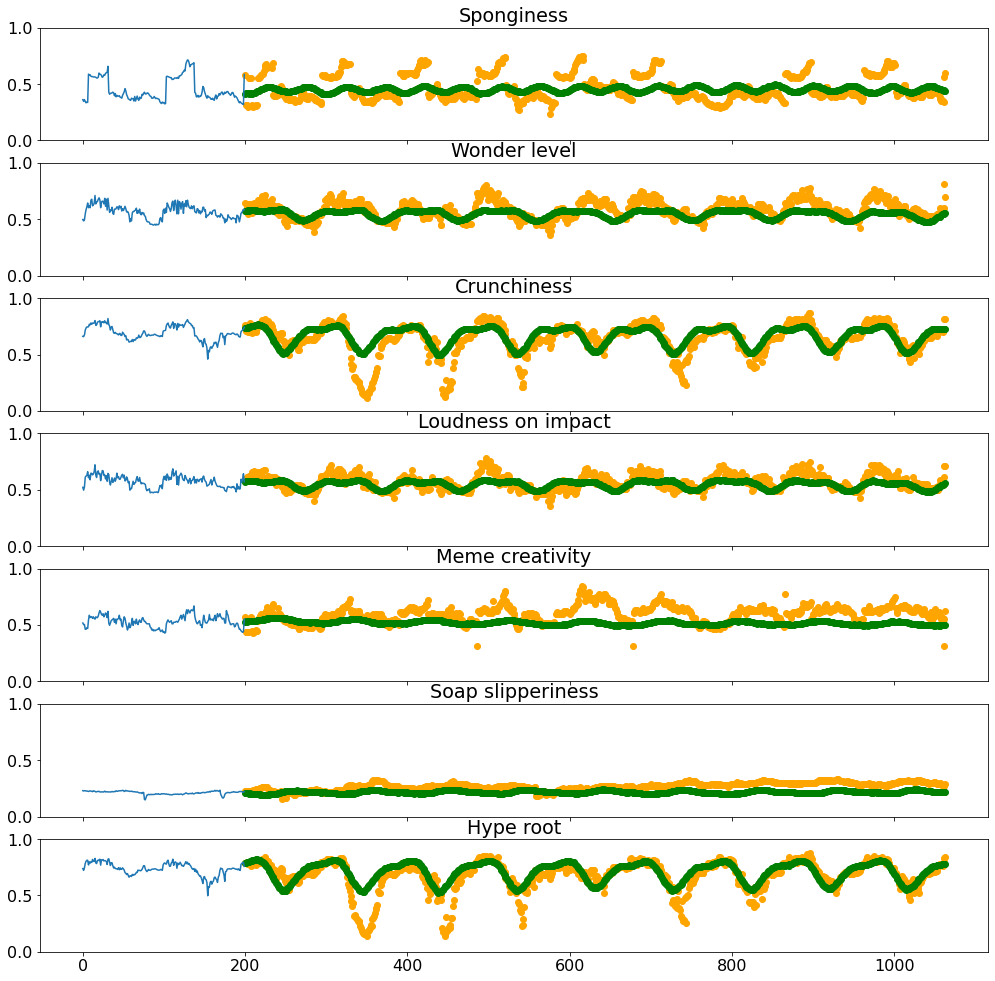

In [150]:
inspect_multivariate_prediction(X_test, y_test, predictions, target_labels, telescope)

In [151]:
maes = []
for i in range(predictions.shape[1]):
    ft_maes = []
    for j in range(predictions.shape[2]):
        ft_maes.append(np.mean(np.abs(y_test[:,i,j]-predictions[:,i,j]), axis=0))
    ft_maes = np.array(ft_maes)
    maes.append(ft_maes)
maes = np.array(maes)

In [152]:
future_predictions = model.predict(future)

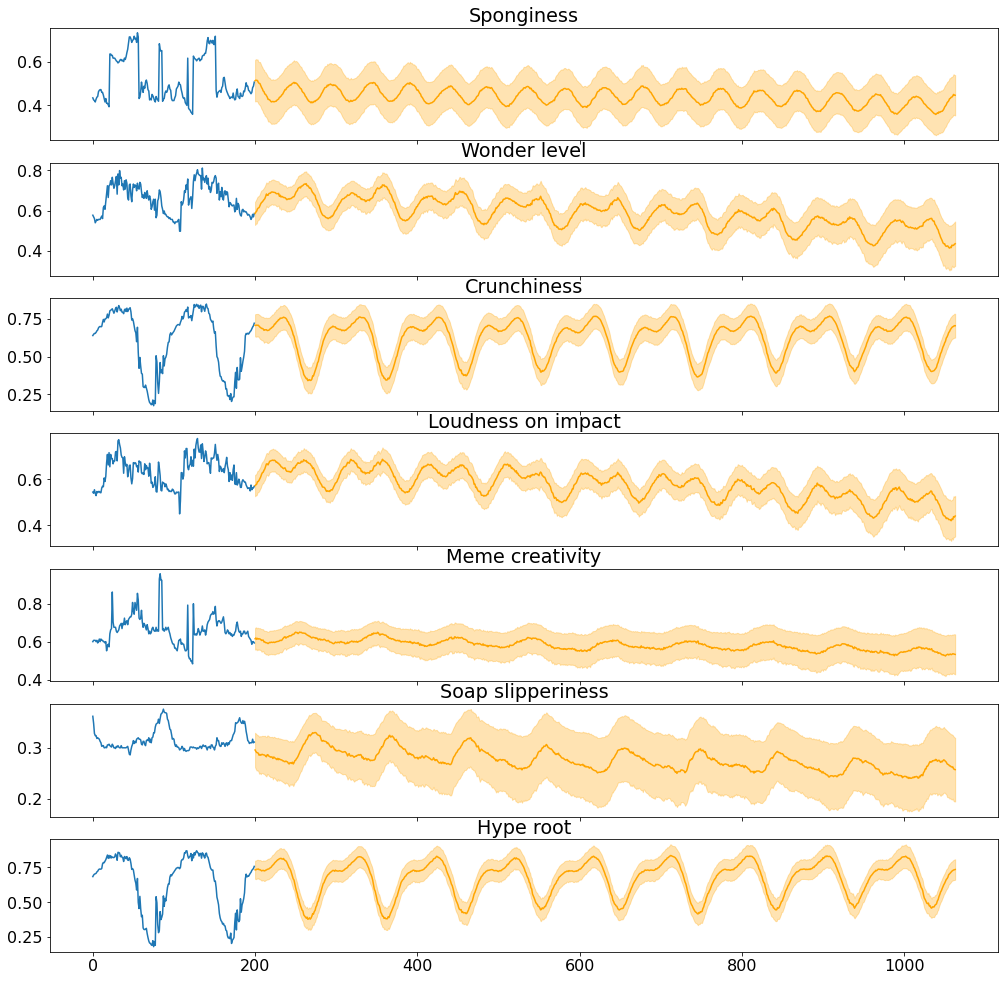

In [153]:
figs, axs = plt.subplots(len(target_labels), 1, sharex=True, figsize=(17,17))
for i, col in enumerate(target_labels):
    axs[i].plot(np.arange(len(future[0,:,i])), future[0,:,i])
    axs[i].plot(np.arange(len(future[0,:,i]), len(future[0,:,i])+telescope), future_predictions[0,:,i], color='orange')
    axs[i].fill_between(
        np.arange(len(future[0,:,i]), len(future[0,:,i])+telescope), 
        future_predictions[0,:,i]+maes[:,i], 
        future_predictions[0,:,i]-maes[:,i], 
        color='orange', alpha=.3)
    axs[i].set_title(col)
    # axs[i].set_ylim(0,1)
plt.show()

AUTOREGRESSION

In [154]:
target_labels = dataset.columns
telescope = 1

In [155]:
X_train, y_train = build_sequences(X_train_raw, target_labels, window, stride, telescope)
X_test, y_test = build_sequences(X_test_raw, target_labels, window, stride, telescope)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13080, 200, 7), (13080, 1, 7), (560, 200, 7), (560, 1, 7))

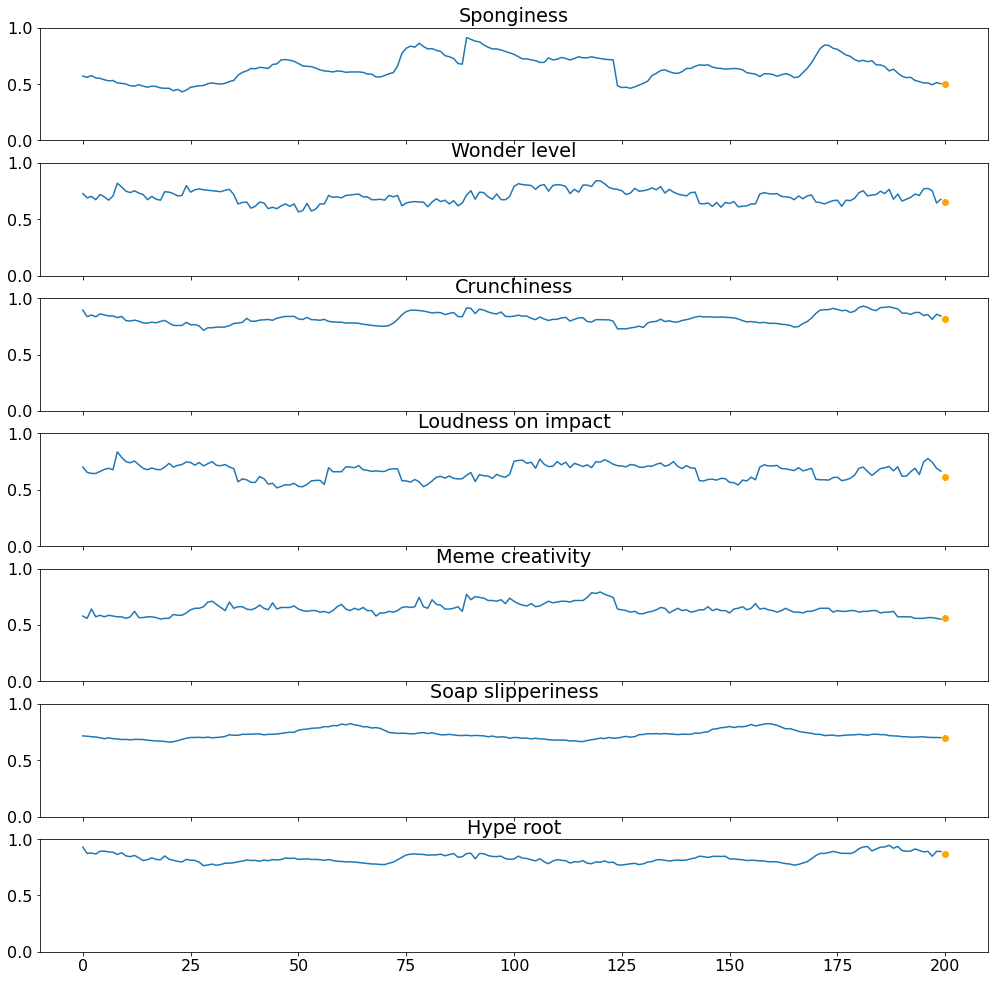

In [156]:
inspect_multivariate(X_train, y_train, target_labels, telescope)




In [157]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1:]
batch_size = 32
epochs = 200

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 200, 7)]          0         
                                                                 
 bidirectional_17 (Bidirecti  (None, 200, 128)         36864     
 onal)                                                           
                                                                 
 conv1d_21 (Conv1D)          (None, 200, 64)           24640     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 50, 64)           0         
 1D)                                                             
                                                                 
 bidirectional_18 (Bidirecti  (None, 50, 64)           24832     
 onal)                                                           
                                                             

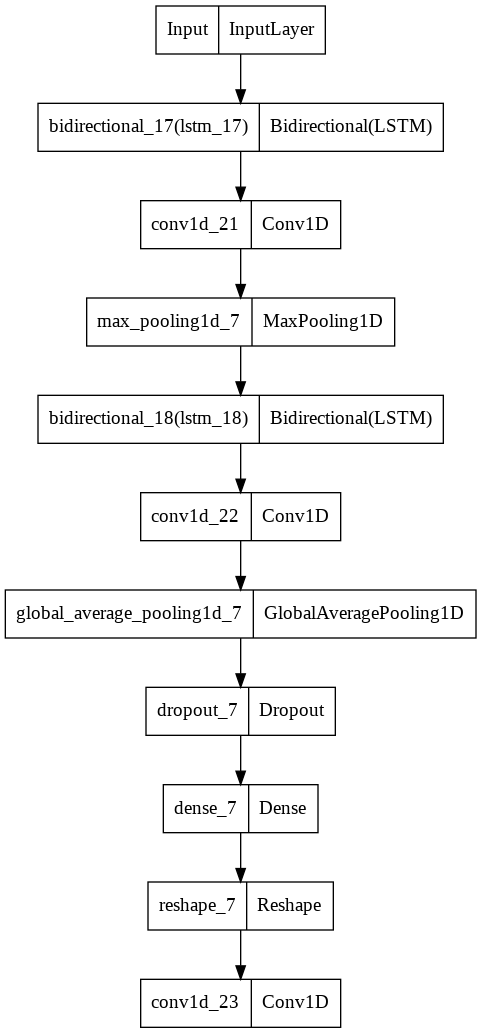

In [158]:
model = build_CONV_LSTM_model(input_shape, output_shape)
model.summary()
tfk.utils.plot_model(model, expand_nested=True)

In [ ]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=20, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=20, factor=0.5, min_lr=1e-6)
    ]
).history

Epoch 1/200
368/368 [==============================] - 57s 134ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0154 - val_mse: 0.0154 - lr: 0.0010
Epoch 2/200
368/368 [==============================] - 48s 129ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0063 - val_mse: 0.0063 - lr: 0.0010
Epoch 3/200
368/368 [==============================] - 48s 129ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0034 - val_mse: 0.0034 - lr: 0.0010
Epoch 4/200
368/368 [==============================] - 47s 129ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0024 - val_mse: 0.0024 - lr: 0.0010
Epoch 5/200
368/368 [==============================] - 48s 129ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0021 - val_mse: 0.0021 - lr: 0.0010
Epoch 6/200
368/368 [==============================] - 48s 129ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0022 - val_mse: 0.0022 - lr: 0.0010
Epoch 7/200
368/368 [==============================] - 47s 129ms/step - loss: 0.0019 - mse: 0.0019 - val_l

In [ ]:
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error (Loss)')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['mse'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_mse'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Absolute Error')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
model.save('Auroregressiveclassicwithmodifiedparameters')
model = tfk.models.load_model('Auroregressiveclassicwithmodifiedparameters')

In [ ]:
# Predict the test set 
predictions = model.predict(X_test)
print(predictions.shape)

mean_squared_error = tfk.metrics.mse(y_test.flatten(),predictions.flatten())
mean_absolute_error = tfk.metrics.mae(y_test.flatten(),predictions.flatten())
mean_squared_error, mean_absolute_error

In [ ]:
inspect_multivariate_prediction(X_test, y_test, predictions, target_labels, telescope)

In [ ]:
reg_telescope = 864
X_test_reg, y_test_reg = build_sequences(X_test_raw, target_labels, window, stride, reg_telescope)
X_test_reg.shape, y_test_reg.shape

In [ ]:
reg_predictions = np.array([])
X_temp = X_test_reg
for reg in range(reg_telescope):
    pred_temp = model.predict(X_temp)
    if(len(reg_predictions)==0):
        reg_predictions = pred_temp
    else:
        reg_predictions = np.concatenate((reg_predictions,pred_temp),axis=1)
    X_temp = np.concatenate((X_temp[:,1:,:],pred_temp), axis=1)

In [ ]:
mean_squared_error = tfk.metrics.mse(y_test_reg.flatten(),reg_predictions.flatten())
mean_absolute_error = tfk.metrics.mae(y_test_reg.flatten(),reg_predictions.flatten())
mean_squared_error, mean_absolute_error

In [ ]:
inspect_multivariate_prediction(X_test_reg, y_test_reg, reg_predictions, target_labels, reg_telescope)

In [ ]:
maes = []
for i in range(reg_predictions.shape[1]):
    ft_maes = []
    for j in range(reg_predictions.shape[2]):
        ft_maes.append(np.mean(np.abs(y_test_reg[:,i,j]-reg_predictions[:,i,j]), axis=0))
    ft_maes = np.array(ft_maes)
    maes.append(ft_maes)
maes = np.array(maes)

In [ ]:
reg_future = np.array([])
X_temp = future
for reg in range(reg_telescope):
    pred_temp = model.predict(X_temp)
    if(len(reg_future)==0):
        reg_future = pred_temp
    else:
        reg_future = np.concatenate((reg_future,pred_temp),axis=1)
    X_temp = np.concatenate((X_temp[:,1:,:],pred_temp), axis=1)

In [ ]:
figs, axs = plt.subplots(len(target_labels), 1, sharex=True, figsize=(17,17))
for i, col in enumerate(target_labels):
    axs[i].plot(np.arange(len(future[0,:,i])), future[0,:,i])
    axs[i].plot(np.arange(len(future[0,:,i]), len(future[0,:,i])+reg_telescope), reg_future[0,:,i], color='orange')
    axs[i].fill_between(
        np.arange(len(future[0,:,i]), len(future[0,:,i])+reg_telescope), 
        reg_future[0,:,i]+maes[:,i], 
        reg_future[0,:,i]-maes[:,i], 
        color='orange', alpha=.3)
    axs[i].set_title(col)
    axs[i].set_ylim(0,1)
plt.show()